Prediabetes Health Indicators
========
Data Wrangling & Exploratory Data Analysis
--------------------

Data source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Data has already been cleaned.  Minimal data wrangling required.

Checks & steps completed but not shown here:

* No missing values
* Dummy variables used for responses & categorical features

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1_filename = "diabetes_012_health_indicators_BRFSS2015.csv"
raw_data_filepath = "../../data/raw/"

In [3]:
df1 = pd.read_csv(raw_data_filepath + data1_filename)

In [4]:
# Taken from datacard on Kaggle, augmented by descriptions given in primary source.

column_descriptions = {
    'Diabetes_012':"0 = no diabetes 1 = prediabetes 2 = diabetes",
     'HighBP':"0 = no high BP 1 = high BP",
     'HighChol':"0 = no high cholesterol 1 = high cholesterol",
     'CholCheck':"0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years",
     'BMI':"Body Mass Index",
     'Smoker':"Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes",
     'Stroke':"(Ever told) you had a stroke. 0 = no 1 = yes",
     'HeartDiseaseorAttack':"coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes",
     'PhysActivity':"physical activity in past 30 days - not including job 0 = no 1 = yes",
     'Fruits':"Consume Fruit 1 or more times per day 0 = no 1 = yes ",
     'Veggies':"Consume Vegetables 1 or more times per day 0 = no 1 = yes",
     'HvyAlcoholConsump':"Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no",
     'AnyHealthcare':"Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes",
     'NoDocbcCost':"Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes",
     'GenHlth':"Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor",
     'MentHlth':"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days",
     'PhysHlth':"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days",
     'DiffWalk':"Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes",
     'Sex':"0 = female 1 = male",
     'Age':"13-level age category (_AGEG5YR see codebook) 1 = 18-24, 2 = 25-29, 3 = 30-34, etc, 9 = 60-64, 13 = 80 or older",
     'Education':"Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)",
     'Income':"Income scale (INCOME2 see codebook) scale 1-8. 1 = less than $10k, 2 = less than $15k, 3 = less than $20k, 4 = less than $25k, 5 = less than $35k, 6 = less than $50k, 7 = less than $75k, 8 = $75k or more"
}

## Basic data examination

In [5]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
list(df1.columns)

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df1_description = df1.describe()
df1_description

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df1.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

* Most variables are binary.

## Explore features

#### Split features into two categories, binary and non-binary variables.

In [10]:
# List of columns that have values greater than 1, excluding target variable
large_val_columns = [col for col in df1_description if df1_description[col]['max'] > 2 and col!="Diabetes_012"]
print(len(large_val_columns))
print(large_val_columns)

7
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [11]:
# List of columns that have values less than or equal to 1, excluding target variable
small_val_columns = [col for col in df1_description if df1_description[col]['max'] <= 1 and col!="Diabetes_012"]
print(len(small_val_columns))
print(small_val_columns)

14
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


### Non-binary variable histograms

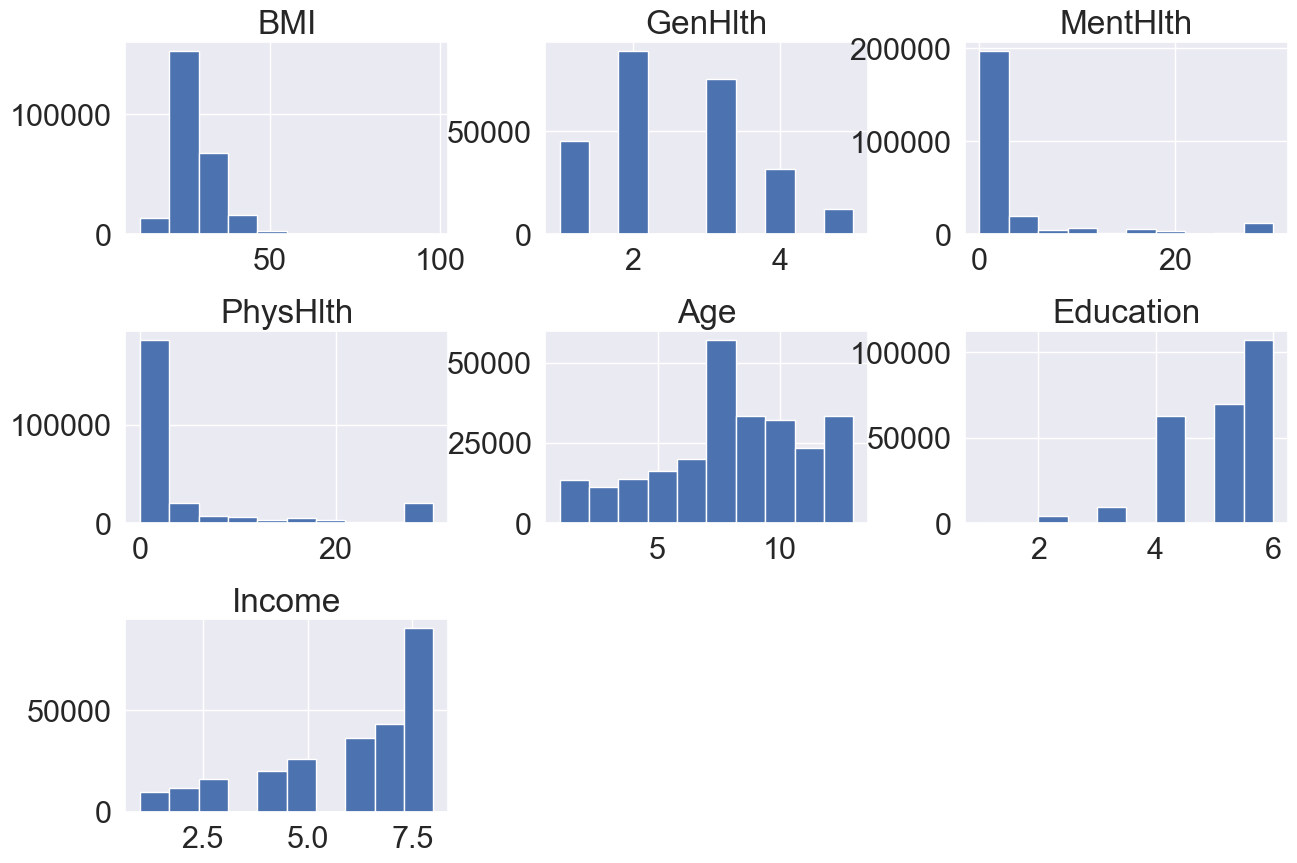

In [44]:
df1[large_val_columns].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

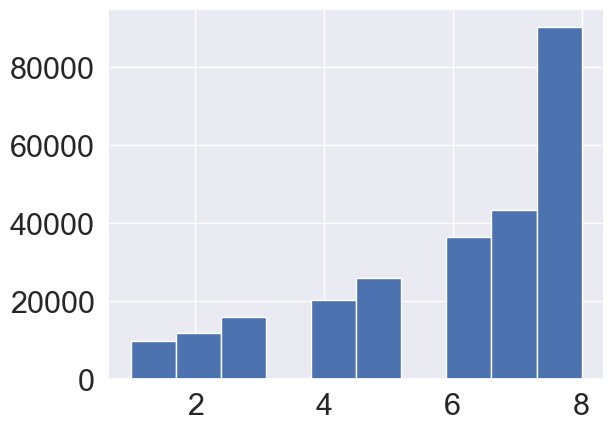

In [45]:
df1['Income'].hist()
plt.show()

In [66]:
df1['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

* Apparent gaps in histogram are only an artifact of plot rendering, not actually present in the data.

In [82]:
(df1['Fruits'].value_counts()[0])/df1['Fruits'].value_counts().sum()

0.36574424471775463

In [15]:
column_descriptions['Income']

'Income scale (INCOME2 see codebook) scale 1-8. 1 = less than $10k, 2 = less than $15k, 3 = less than $20k, 4 = less than $25k, 5 = less than $35k, 6 = less than $50k, 7 = less than $75k, 8 = $75k or more'

### Binary variable histograms

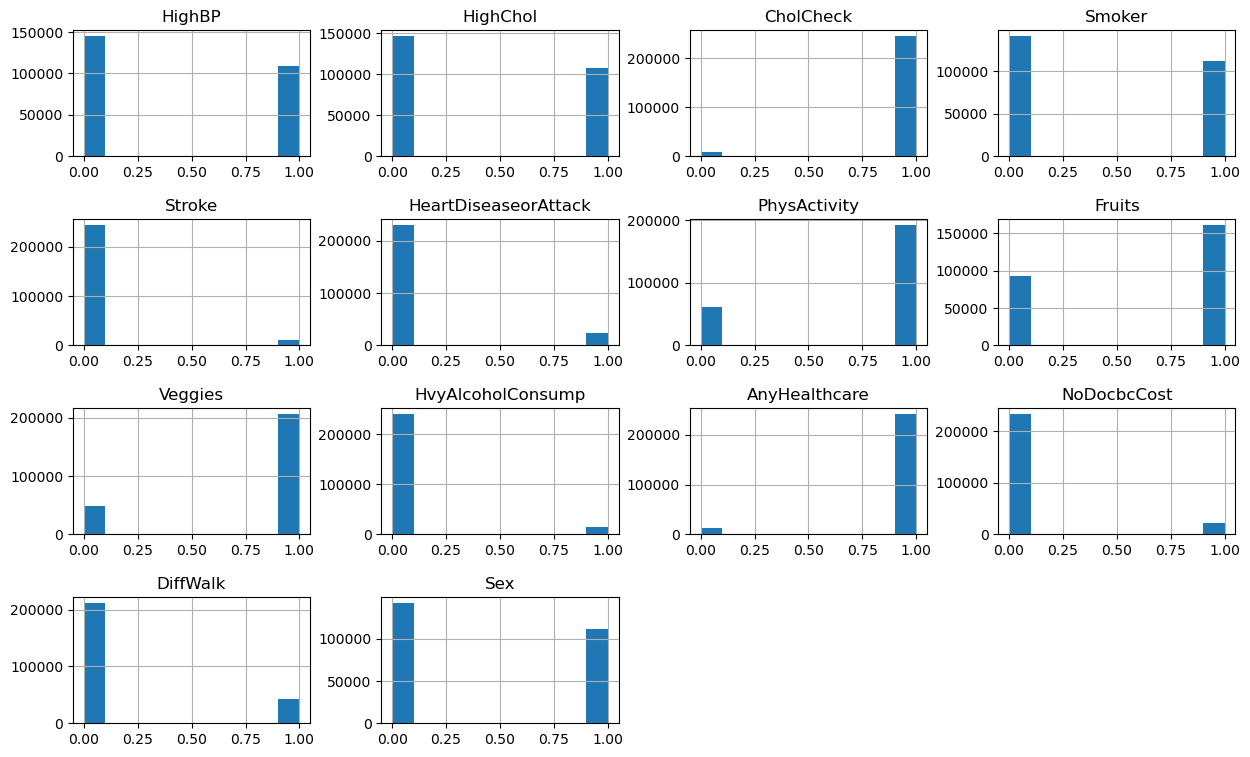

In [63]:
plt.rcdefaults()
df1[small_val_columns].hist(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
plt.show()

* Most binary variables are unbalanced.

In [17]:
def show_histogram(col, width=1):
    sns.reset_defaults()
    print(col)
    print(column_descriptions[col])
    sns.histplot(data=df1, x = col, hue = 'Diabetes_012', palette="tab10", binwidth=width, stat='percent', multiple='fill')
    plt.show()

GenHlth
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor


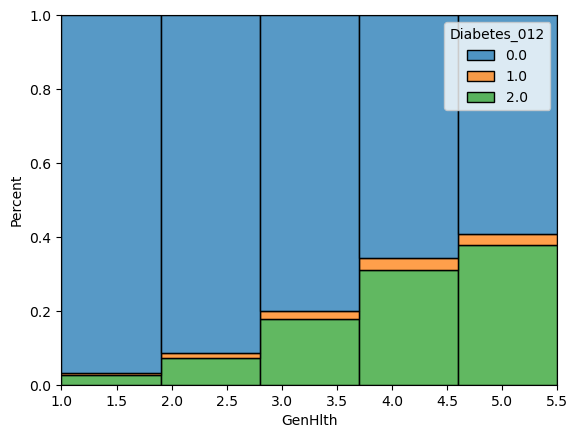

In [91]:
show_histogram('GenHlth', 0.9)

MentHlth
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days


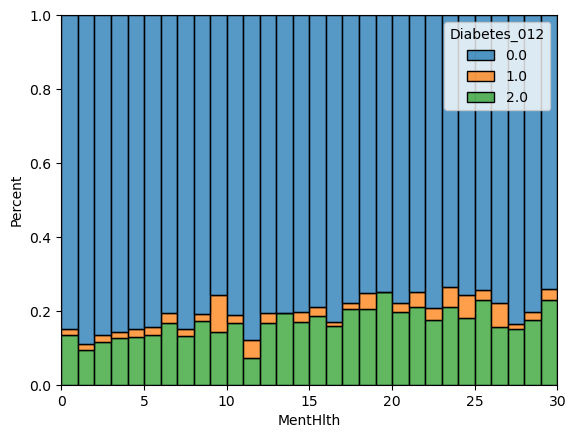

In [19]:
show_histogram('MentHlth')

PhysHlth
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days


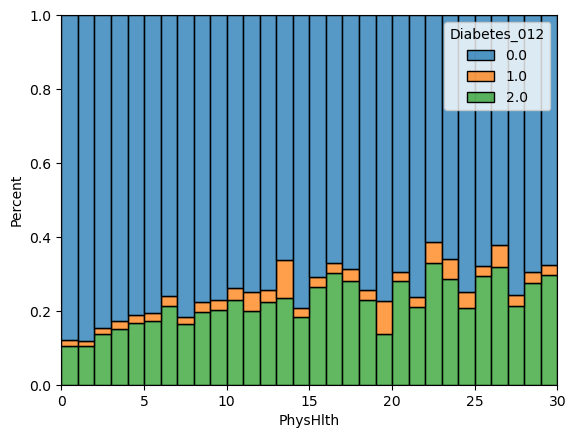

In [20]:
show_histogram('PhysHlth')

Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24, 2 = 25-29, 3 = 30-34, etc, 9 = 60-64, 13 = 80 or older


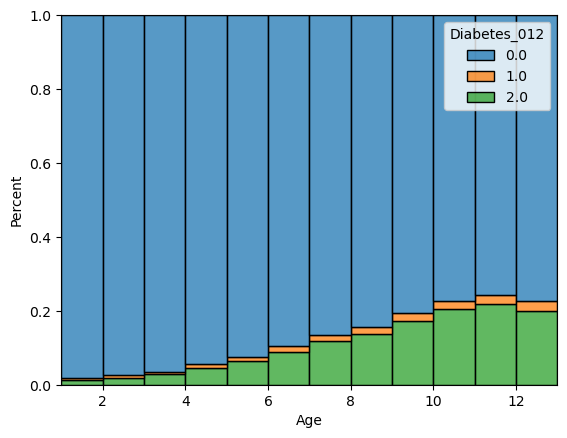

In [21]:
show_histogram('Age')

Education
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)


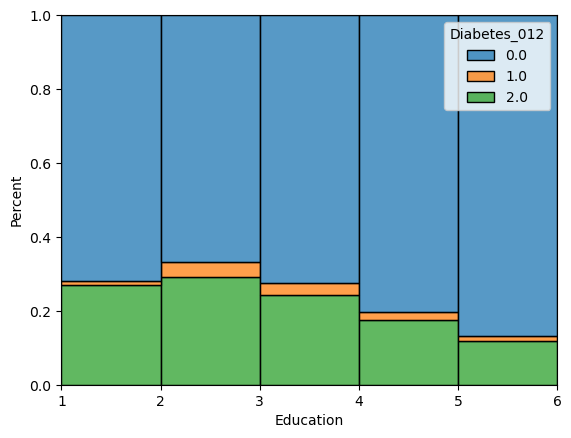

In [22]:
show_histogram('Education')

Income
Income scale (INCOME2 see codebook) scale 1-8. 1 = less than $10k, 2 = less than $15k, 3 = less than $20k, 4 = less than $25k, 5 = less than $35k, 6 = less than $50k, 7 = less than $75k, 8 = $75k or more


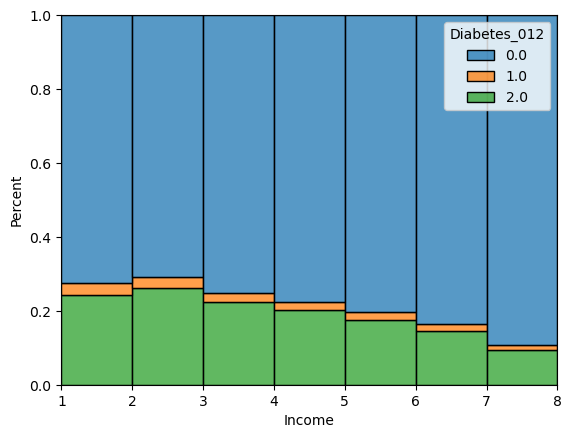

In [23]:
show_histogram('Income')

Stroke
(Ever told) you had a stroke. 0 = no 1 = yes


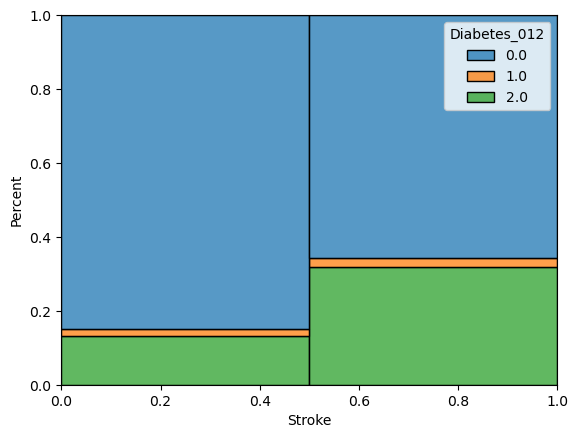

In [83]:
show_histogram('Stroke', 0.5)

HighBP
0 = no high BP 1 = high BP


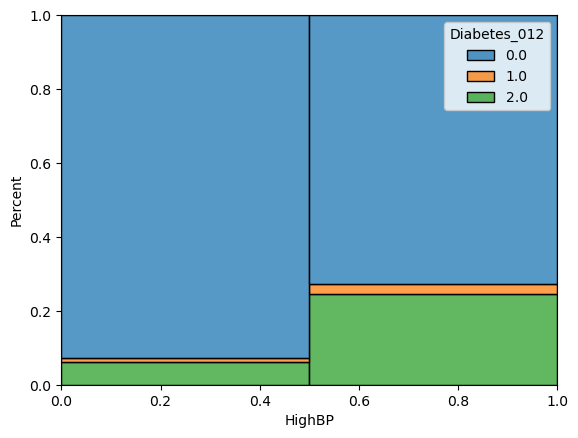

HighChol
0 = no high cholesterol 1 = high cholesterol


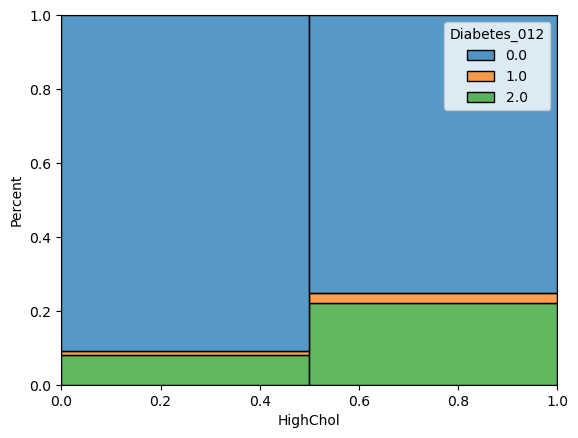

CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years


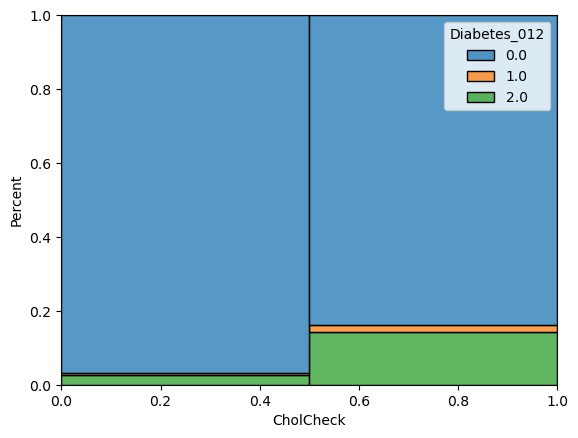

Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes


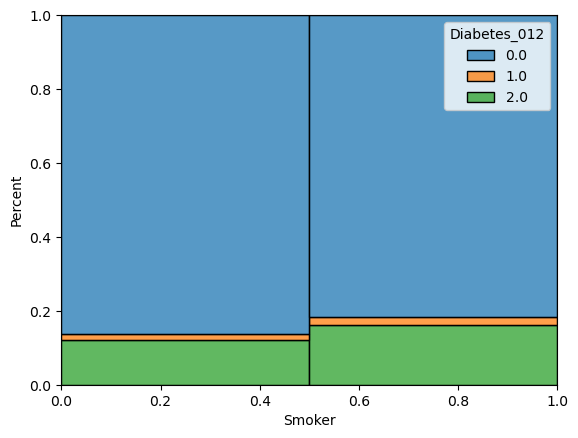

Stroke
(Ever told) you had a stroke. 0 = no 1 = yes


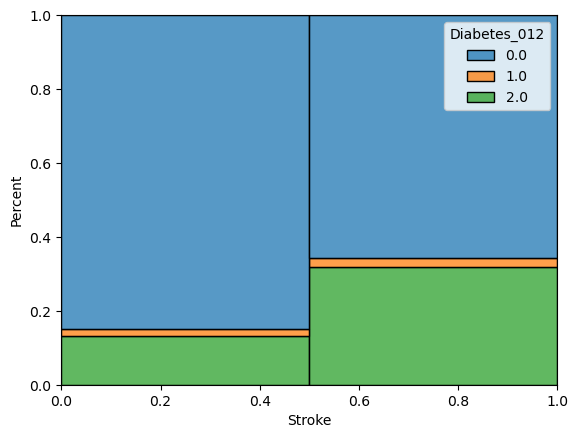

HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes


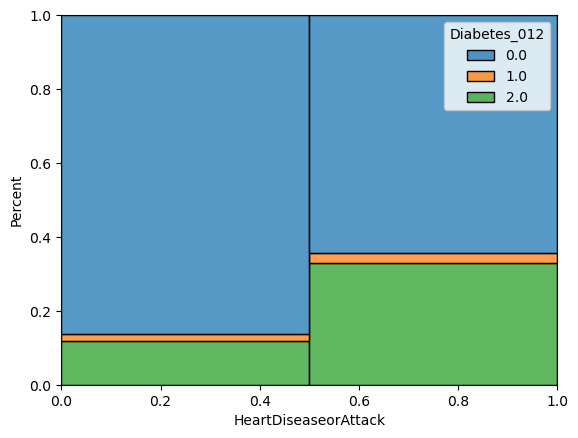

PhysActivity
physical activity in past 30 days - not including job 0 = no 1 = yes


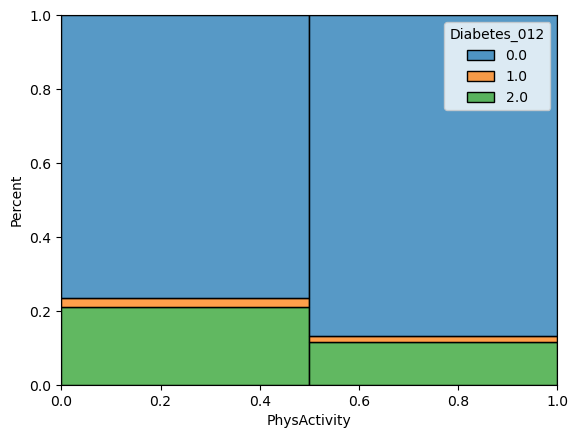

Fruits
Consume Fruit 1 or more times per day 0 = no 1 = yes 


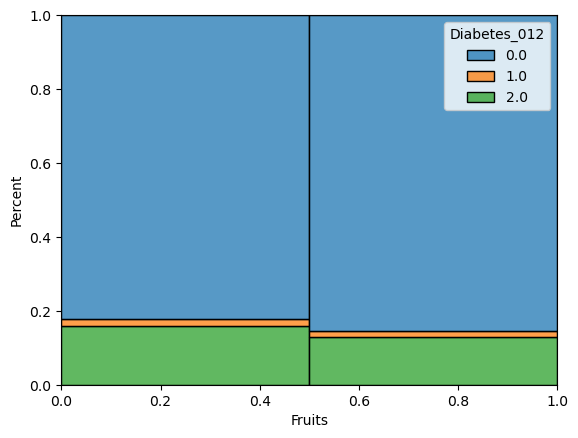

Veggies
Consume Vegetables 1 or more times per day 0 = no 1 = yes


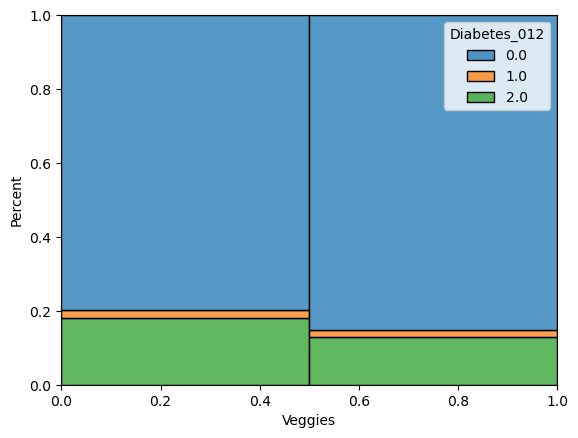

HvyAlcoholConsump
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no


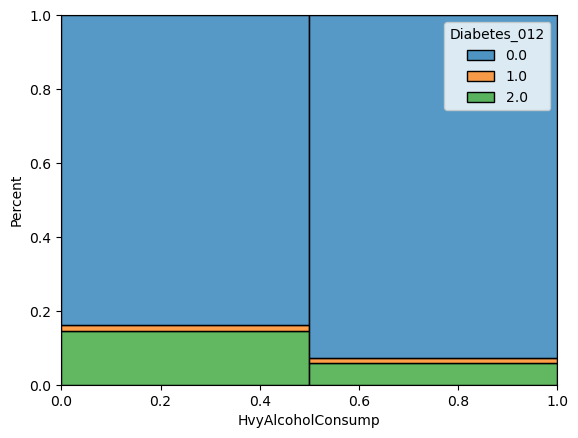

AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes


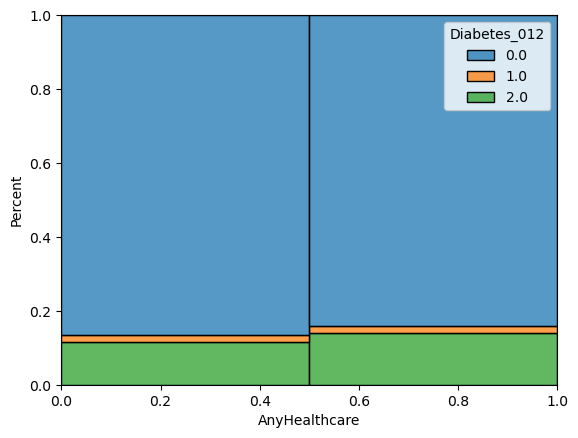

NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes


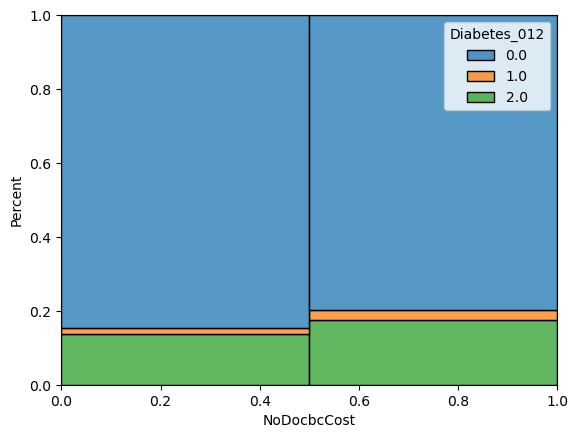

DiffWalk
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes


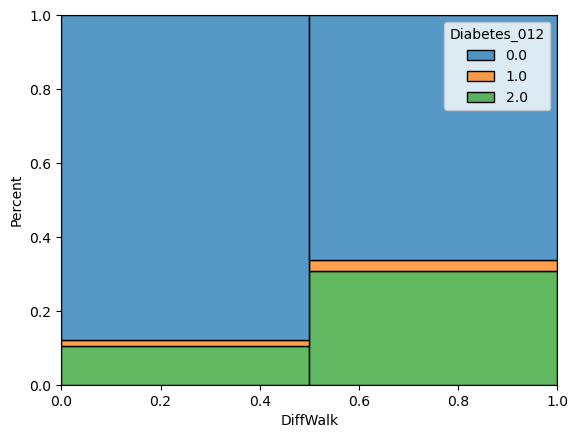

Sex
0 = female 1 = male


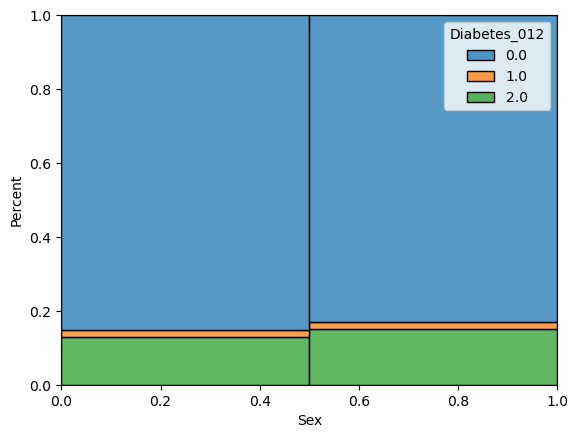

In [25]:
for col in small_val_columns:
    show_histogram(col, 0.5)

## Explore target variable

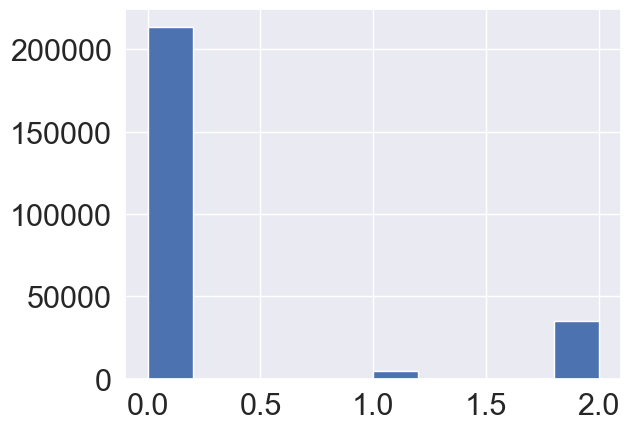

In [37]:
df1['Diabetes_012'].hist()
plt.show()

In [27]:
df1['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [28]:
column_descriptions['Diabetes_012']

'0 = no diabetes 1 = prediabetes 2 = diabetes'

* Unbalanced target data.  Order of magnitude differences between classes of target variable.

## Explore correlations

In [92]:
df1.corr()['Diabetes_012']

Diabetes_012            1.000000
HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
PhysActivity           -0.121947
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
GenHlth                 0.302587
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Sex                     0.031040
Age                     0.185026
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

In [29]:
corr_coefs = df1.corr()

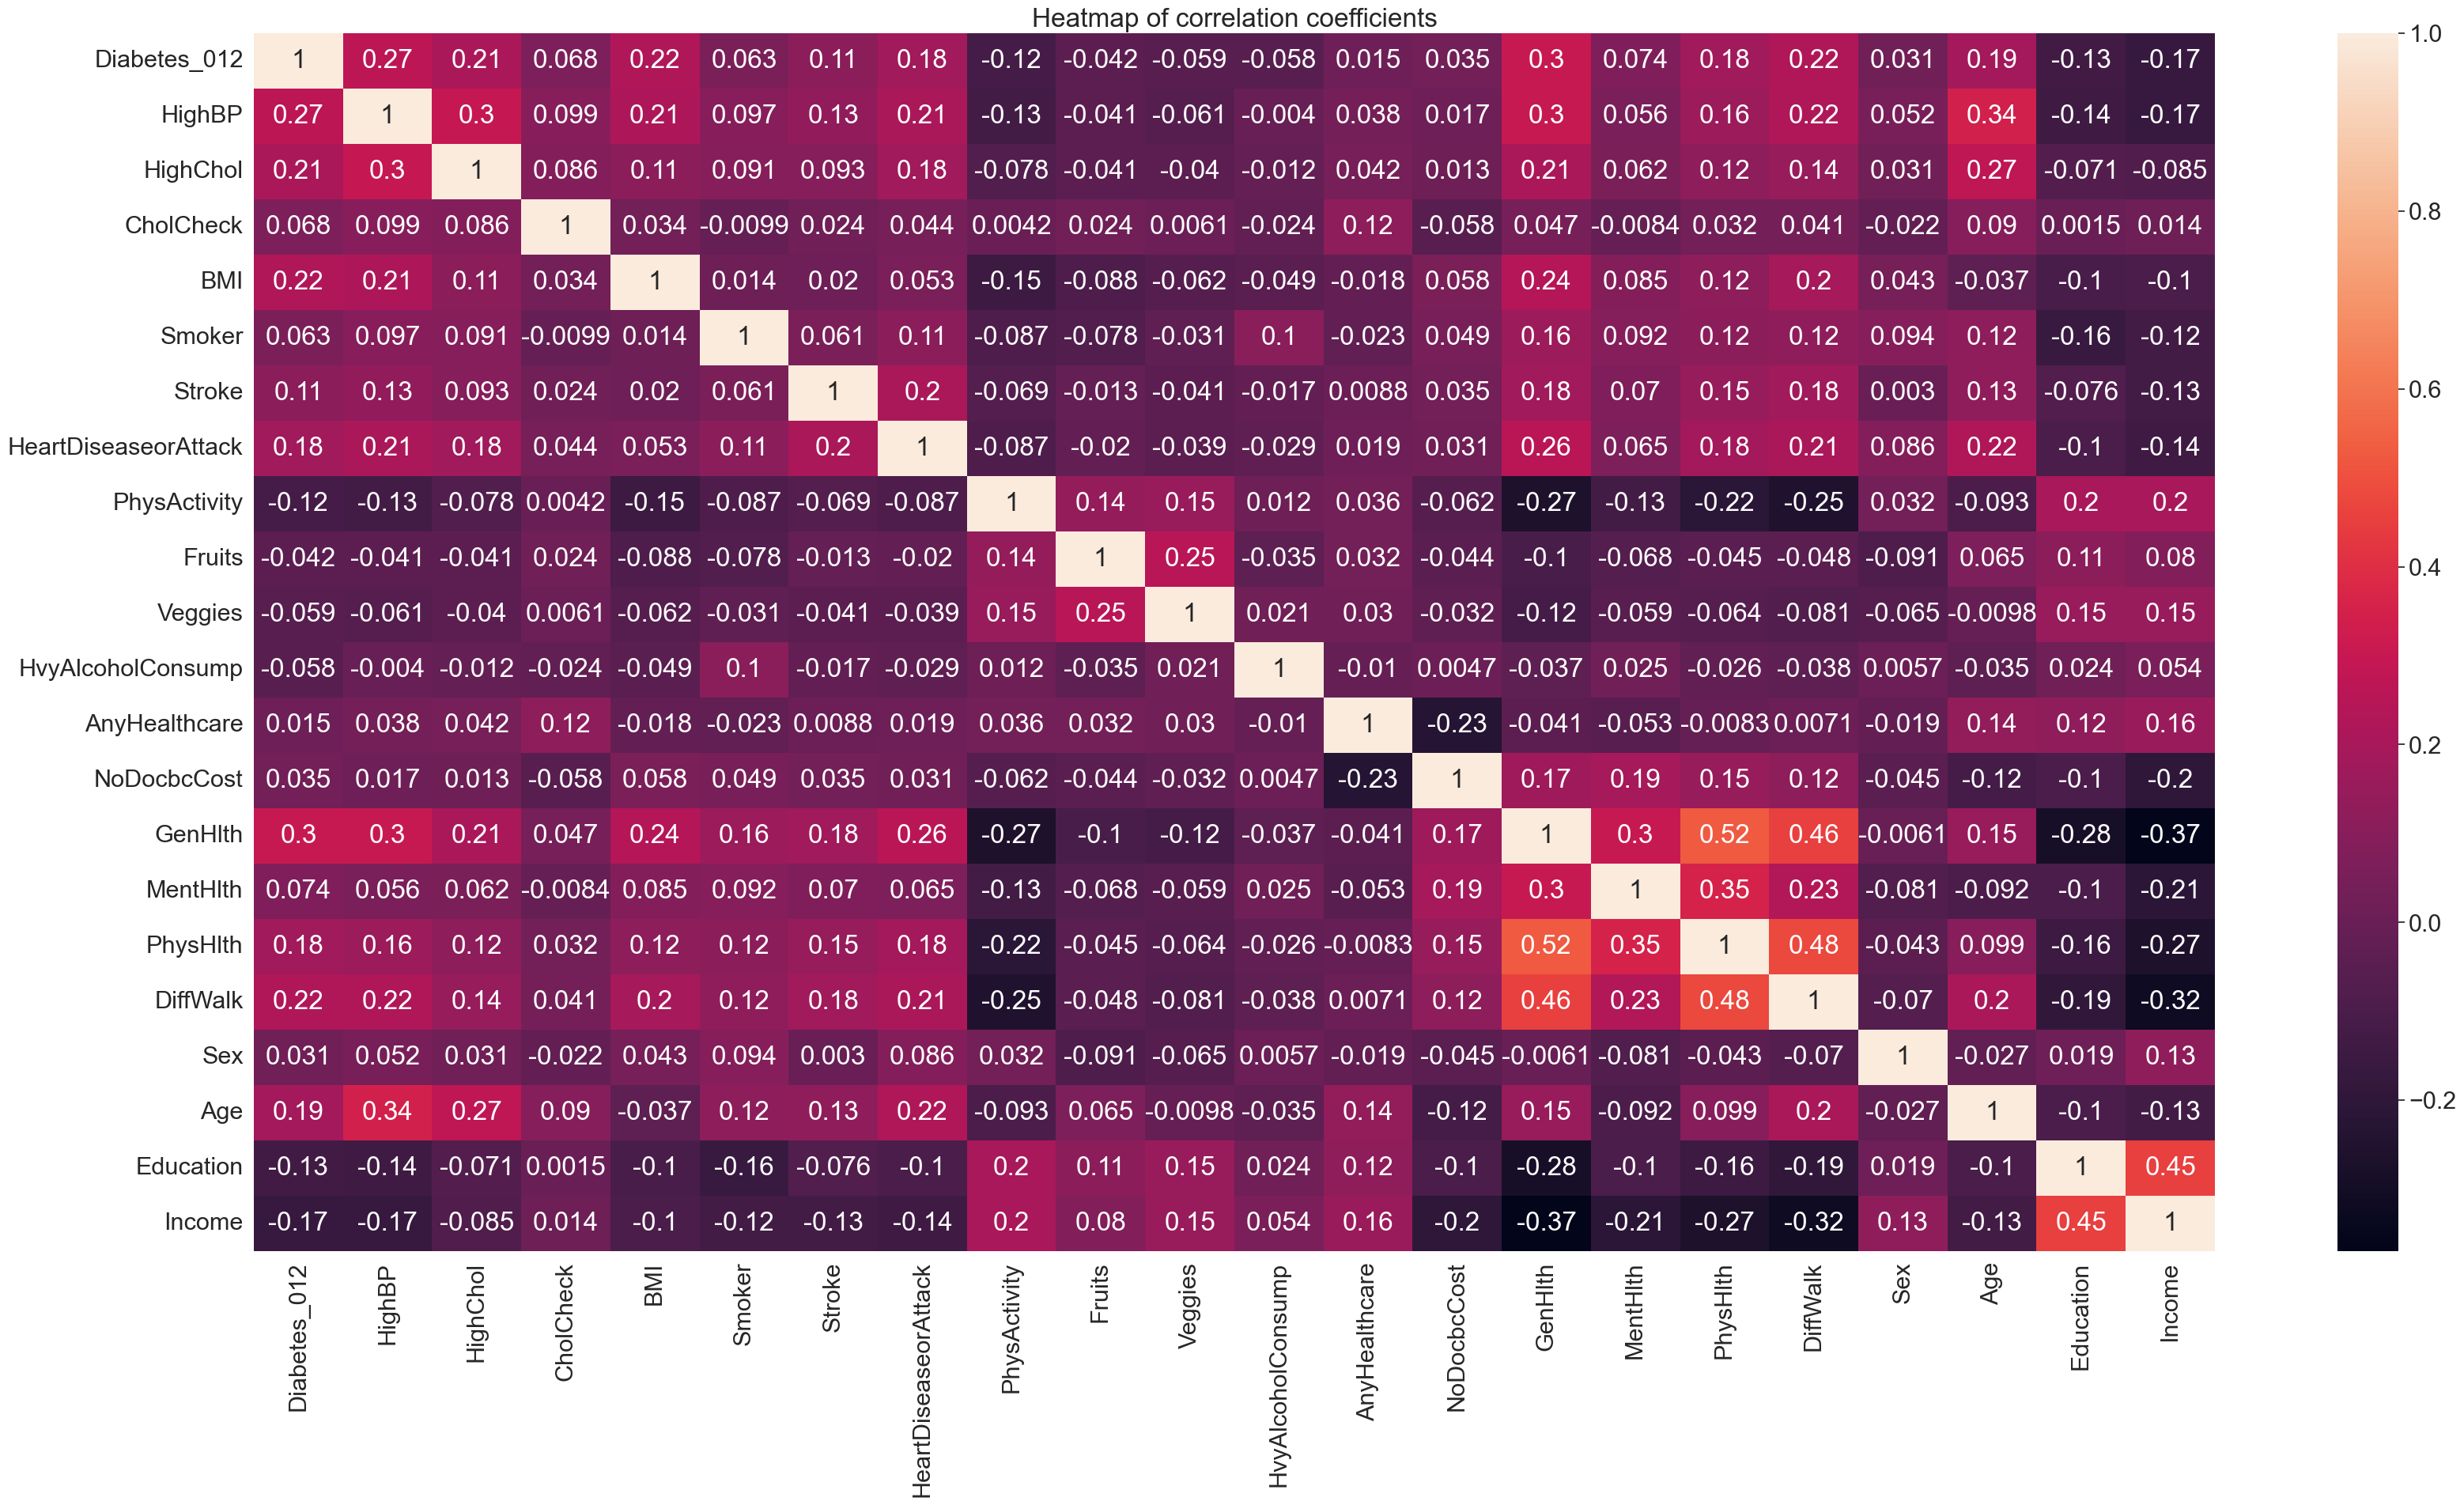

In [38]:
sns.set(font_scale=2)
plt.figure(figsize=(40,20))
plt.title('Heatmap of correlation coefficients')

sns.heatmap(corr_coefs, annot=True)
plt.show()

In [31]:
corr_coefs.sort_values("Diabetes_012", ascending=False)['Diabetes_012']

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

* Lower is better for some variables, higher is better for others.
* GenHlth: Lower val is better

* No unusual correlations immediately obvious.

# EDA key points

## Target feature

Target variable `Diabetes_012` is unbalanced, with order of magnitude differences between 3 classes.  Target prediction of prediabetes has lowest value count.

## Variables

Variables can be broadly split into two categories, binary and non-binary.  There are 14 binary variables and 7 non-binary variables.  Both categories contain unbalanced data.

Correlation coefficients are evenly distributed, no outliers high or low.

Scaling of non-binary variables may be necessary. Largest value of any variable is 98.